<a href="https://colab.research.google.com/github/viliusmac/Failai/blob/master/FI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

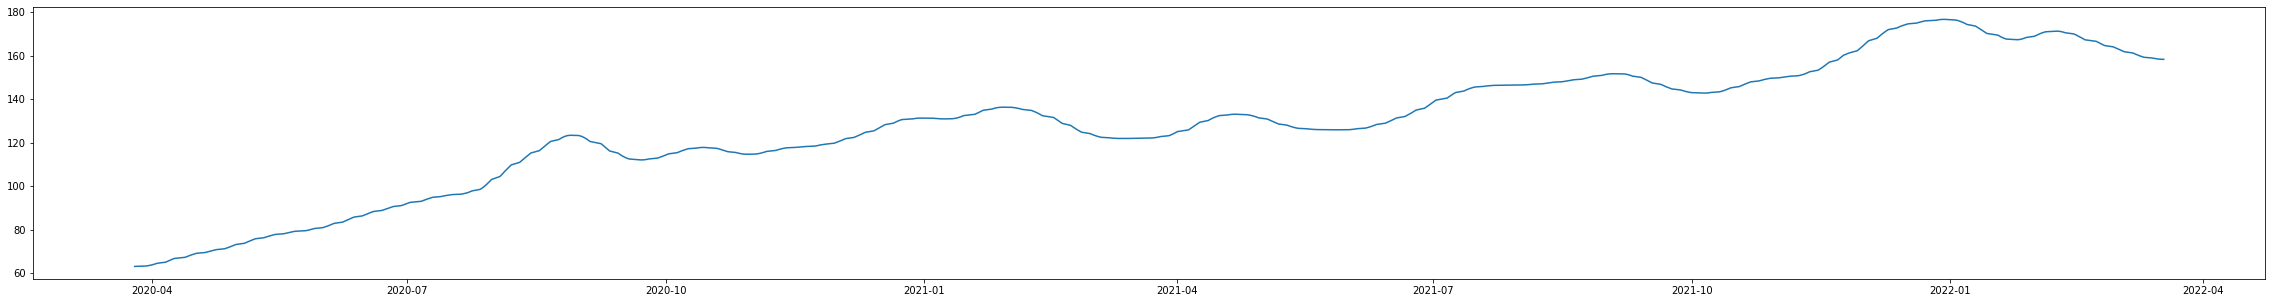

In [ ]:
# Typical price
# Typical Price = ( High Price + Low Price + Close Price ) / 3
#!pip install yfinance
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d


df = yf.download('AAPL', 
                      start='2020-03-26', 
                      end='2022-03-20', 
                      progress=False,
)

typical_price = (df.High + df.Low + df.Close)/3
smooth_values = gaussian_filter1d(typical_price.values, sigma=5)

plt.rcParams["figure.figsize"] = (40,5)

plt.plot(typical_price.index, smooth_values)


APPL | 2020-03-26 - 2022-03-20

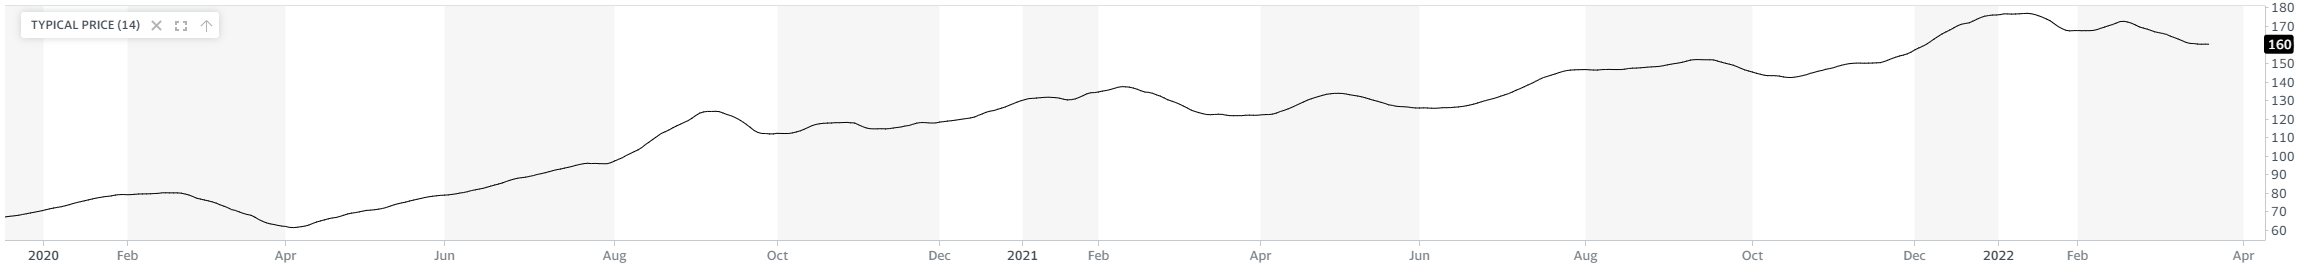

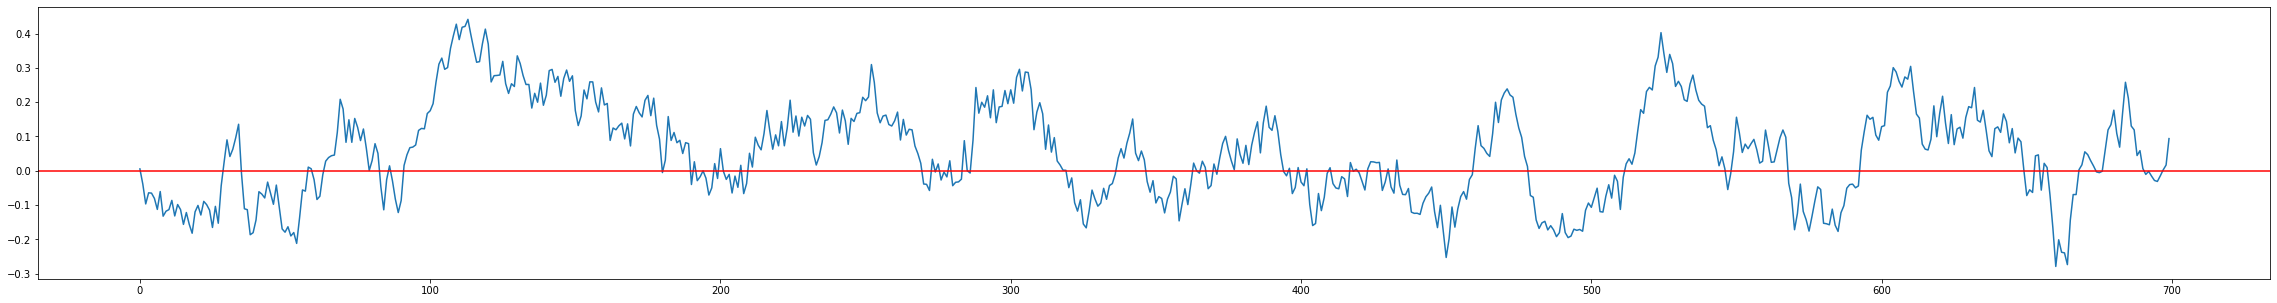

In [ ]:
# Chaikin Money Flow
# CMF = n-day Sum of [(((C - L) - (H - C)) / (H - L)) x Vol] / n-day Sum of Vol

df = yf.download('AAPL', 
                      start='2019-05-14', 
                      end='2022-03-22', 
                      progress=False,
)
period = 20

money_flow_multiplier = ((df.Close - df.Low) - (df.High - df.Close)) / (df.High - df.Low)
money_flow_volume = money_flow_multiplier * df.Volume

vol_sum = []
for index, val in enumerate(money_flow_volume):
    vol_sum.append(sum(df.Volume[index-period:index]))

mfv_sum = []
for index, val in enumerate(money_flow_volume):
    mfv_sum.append(sum(money_flow_volume[index-period:index]))

vol_sum = vol_sum[period:]
mfv_sum = mfv_sum[period:]

result = [i / j for i, j in zip(mfv_sum, vol_sum)]

plt.plot(result)
plt.axhline(y=0, color='r', linestyle='-')

APPL | 2019-05-14 - 2022-03-22

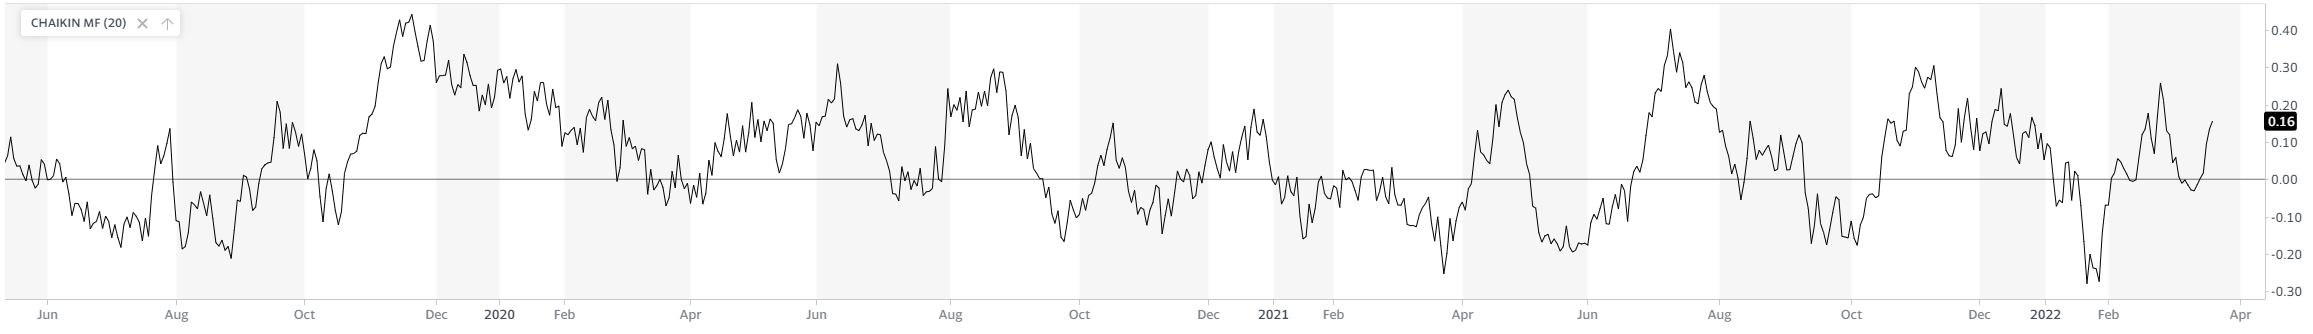

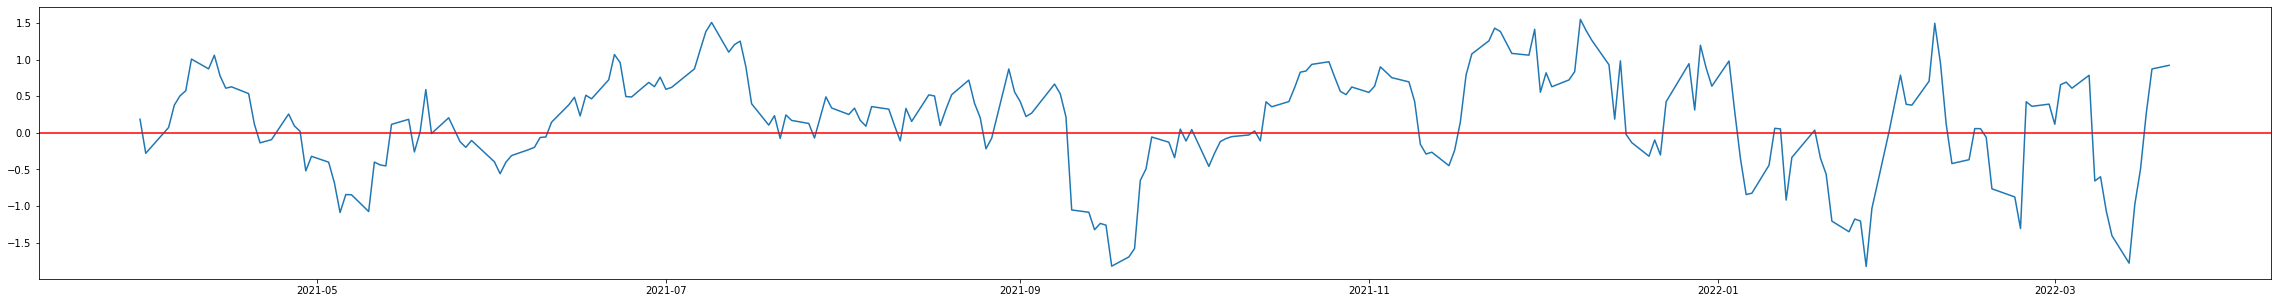

In [ ]:
# QStick indicator
# QStick = MA (n, (Close - Open)),

df = yf.download('AAPL', 
                      start='2021-03-22', 
                      end='2022-03-22', 
                      progress=False,
)

period = 8
QStick = (df.Close - df.Open)

# QSI = EMA or SMA of (Close−Open)
# SMA:
plt.plot(QStick.rolling(window=period).mean())
# EMA:
# plt.plot(QStick.ewm(span=period).mean())

plt.axhline(y=0, color='r', linestyle='-')


AAPL | 2021-03-22 - 2022-03-22

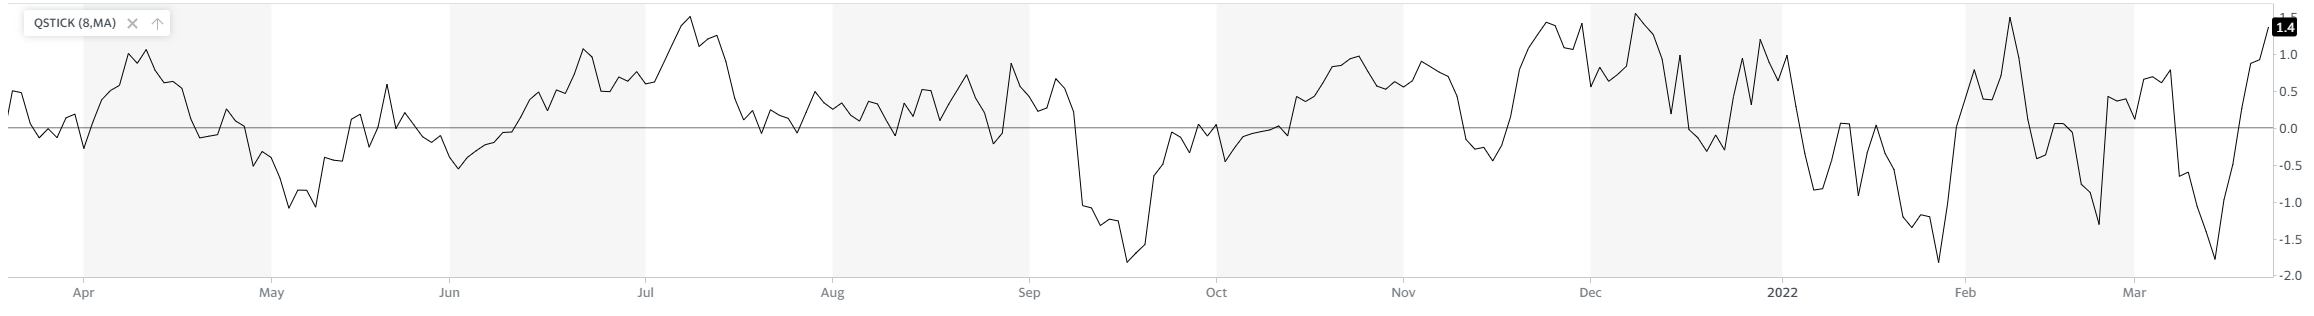